In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt

from seabreeze.spectrometers import list_devices, Spectrometer
from pylablib.devices import Thorlabs



In [2]:
available_devices = Thorlabs.list_kinesis_devices()
if available_devices:
    print("Available devices:", available_devices)
else:
    print("No devices found.")


Available devices: [('55357574', 'Kinesis K10CR1 Rotary Stage')]


In [5]:
ans=Thorlabs.list_kinesis_devices()
if ans:
    stage = Thorlabs.KinesisMotor(ans[0][0])
    stage.get_device_info()
    devices = list_devices()
else:
    print("The 'ans' list is empty.")

In [6]:
#First need to home the filter wheel
#must increase the speed otherwise it takes forever
# stage.connect() 
stage.setup_homing(velocity=-500000)
stage.home()
stage.wait_move()
stage.close

<bound method ICommBackendWrapper.close of <pylablib.devices.Thorlabs.kinesis.KinesisMotor object at 0x00000183D93CC430>>

In [7]:
devices = list_devices()
if devices:
    print("Available devices:", devices)
else:
    print("No devices available.")


Available devices: [<SeaBreezeDevice HR4000:HR4C222>]


In [8]:
spec = Spectrometer(devices[0])
spec.integration_time_micros(1e5)

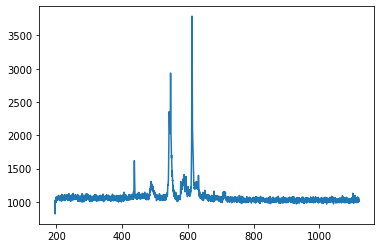

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
wavelengths = spec.wavelengths()
intensities= spec.intensities()
ax.plot(wavelengths,intensities)

In [10]:
stage.move_to(0)
locations = np.linspace(0,-5000000,num=3)
for mm in range(len(locations)):
    stage.move_to(locations[mm])
    stage.wait_move()
    time.sleep(0.5)
    #careful the backlash from the motor, need settling time
    wavelengths = spec.wavelengths()
    intensities= spec.intensities()    
    #plott.set_xdata(wavelengths)
    #plott.set_ydata(intensities)
    ax.plot(wavelengths,intensities)
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(1.0)